[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


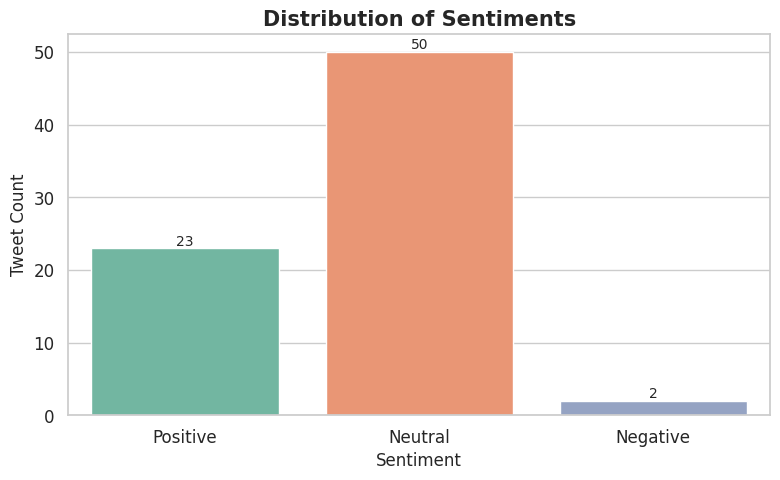

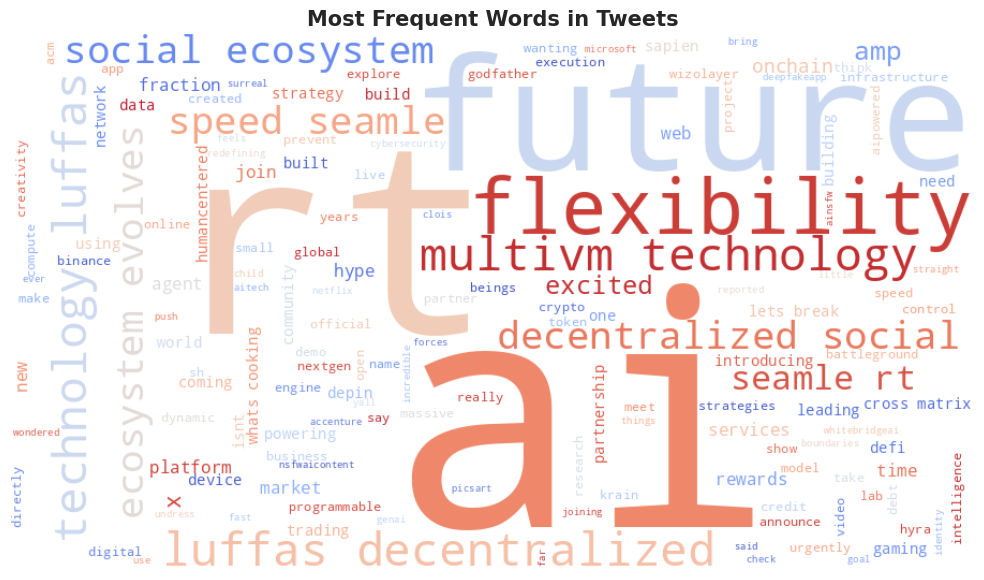

/tmp/ipython-input-5-3600498864.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='tweet_length', palette='Pastel1')


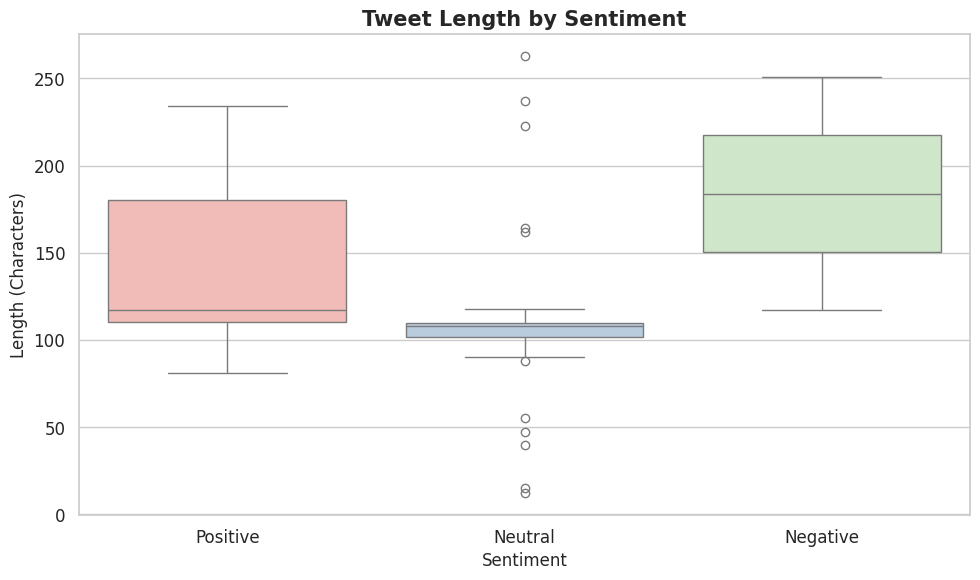

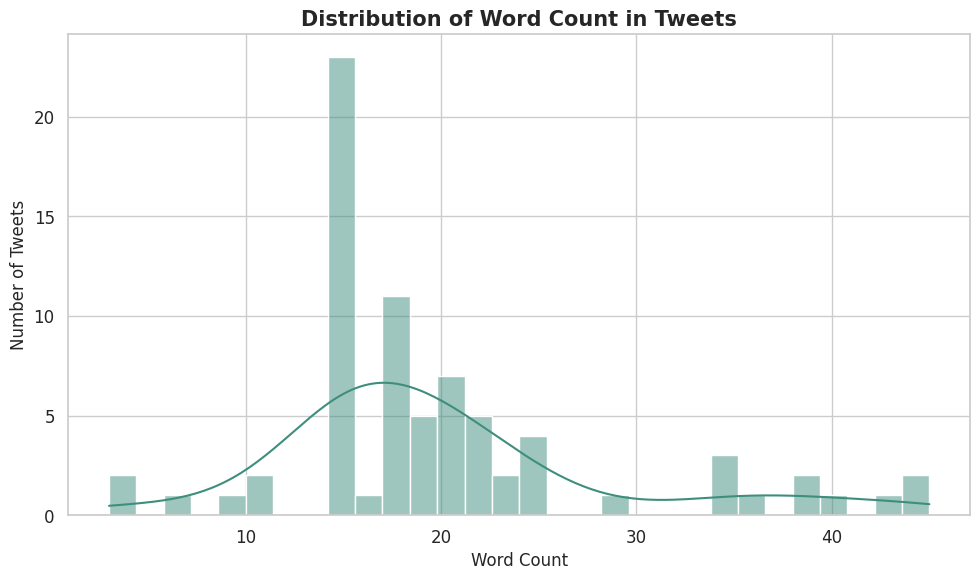

/tmp/ipython-input-5-3600498864.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x='count', y='bigram', palette='viridis')


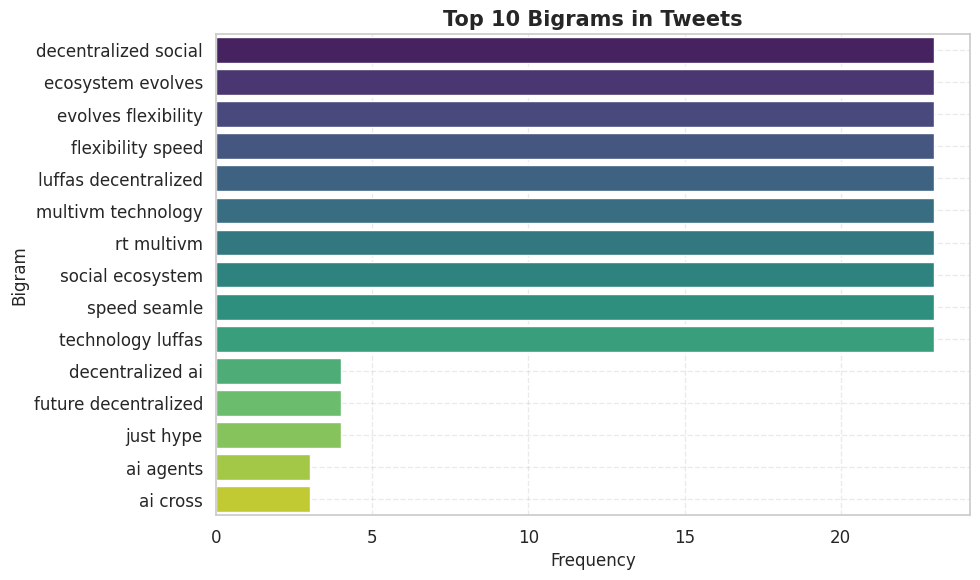

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re

# Optional if running first time
nltk.download('stopwords', download_dir='/root/nltk_data', force=True)

# Add the download directory to NLTK's data path
nltk.data.path.append('/root/nltk_data')

from nltk.corpus import stopwords

# Set Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.1)

df = pd.read_csv("/content/ai_sentiment_cleaned.csv")

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation
    return text

df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

# 1. Sentiment Distribution Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='sentiment', palette='Set2', hue='sentiment', legend=False)
plt.title("Distribution of Sentiments", fontsize=15, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Tweet Count", fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Word Cloud
all_words = " ".join(df['cleaned_text'].dropna())
wordcloud = WordCloud(width=900, height=500, background_color='white',
                      stopwords=set(stopwords.words('english')),
                      colormap='coolwarm', max_words=150).generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Tweets", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Tweet Length by Sentiment (Boxplot)
df['tweet_length'] = df['cleaned_text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='tweet_length', palette='Pastel1')
plt.title("Tweet Length by Sentiment", fontsize=15, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Length (Characters)", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Word Count Distribution
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='#3E8E7E')
plt.title("Distribution of Word Count in Tweets", fontsize=15, fontweight='bold')
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.tight_layout()
plt.show()

# 5. Bigram Frequency Plot
def get_top_bigrams(texts, n=None):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    sorted_bigrams = sorted(freqs, key=lambda x: x[1], reverse=True)
    return sorted_bigrams[:n]

top_bigrams = get_top_bigrams(df['cleaned_text'].dropna(), n=15)
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_df, x='count', y='bigram', palette='viridis')
plt.title("Top 10 Bigrams in Tweets", fontsize=15, fontweight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()